In [9]:
import numpy as np
from numpy.polynomial import Polynomial as P
from numpy.polynomial import Chebyshev as C
from numpy.polynomial import polynomial as poly
from numpy.polynomial.polynomial import polyval
from math import log2
from math import ceil
from scipy.special import binom
import matplotlib.pyplot as plt

In [10]:
def GetF(n: int) -> P:
    p: P = 0
    for i in range(0, n+1):
        p +=  (1 / 4**i) * binom(2*i, i) * (P([0, 1]) * P([1, 0, -1])**i)
    return p


In [11]:
f1 = GetF(1)
print(f"f1 degree: {f1.degree()}; depth: {ceil(log2(f1.degree()))}")
f2 = GetF(2)
print(f"f2 degree: {f2.degree()}; depth: {ceil(log2(f2.degree()))}")
f3 = GetF(3)
print(f"f3 degree: {f3.degree()}; depth: {ceil(log2(f3.degree()))}")
f4 = GetF(4)
print(f"f4 degree: {f4.degree()}; depth: {ceil(log2(f4.degree()))}")
f5 = GetF(5)
print(f"f5 degree: {f5.degree()}; depth: {ceil(log2(f5.degree()))}")
f6 = GetF(6)
print(f"f6 degree: {f6.degree()}; depth: {ceil(log2(f6.degree()))}")
f7 = GetF(7)
print(f"f7 degree: {f7.degree()}; depth: {ceil(log2(f7.degree()))}")
f15 = GetF(15)
print(f"f15 degree: {f15.degree()}; depth: {ceil(log2(f15.degree()))}")
f31 = GetF(31)
print(f"f31 degree: {f31.degree()}; depth: {ceil(log2(f31.degree()))}")
f63 = GetF(63)
print(f"f63 degree: {f63.degree()}; depth: {ceil(log2(f63.degree()))}")

g1_coeffs = [0, (2126/1024), 0, (-1359/1024)]
g1 = P(g1_coeffs)
print(f"\ng1: degree: {g1.degree()}; depth: {ceil(log2(g1.degree()))}")
g2_coeffs = [0, (3334/1024), 0, (-6108/1024), 0, (3796/1024)]
g2 = P(g2_coeffs)
print(f"g2 degree: {g2.degree()}; depth: {ceil(log2(g2.degree()))}")
g3_coeffs = [0, 4589/1024, 0, -16577 /1024, 0, 25614/1024, 0, -12860/1024]
g3 = P(g3_coeffs)
print(f"g3 degree: {g3.degree()}; depth: {ceil(log2(g3.degree()))}")
g4_coeffs = [0, 5850/1024, 0, -34974/1024, 0, 97015/1024, 0, -113492/1024, 0, 46623/1024]
g4 = P(g4_coeffs)
print(f"g4 degree: {g4.degree()}; depth: {ceil(log2(g4.degree()))}")


f1 degree: 3; depth: 2
f2 degree: 5; depth: 3
f3 degree: 7; depth: 3
f4 degree: 9; depth: 4
f5 degree: 11; depth: 4
f6 degree: 13; depth: 4
f7 degree: 15; depth: 4
f15 degree: 31; depth: 5
f31 degree: 63; depth: 6
f63 degree: 127; depth: 7

g1: degree: 3; depth: 2
g2 degree: 5; depth: 3
g3 degree: 7; depth: 3
g4 degree: 9; depth: 4


Numpy power series polynomial fit


/home/dangerginger/code/FHEnom/.venv/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


fit_relu degree: 3072
fit_relu depth: 12
Average error: 0.0006246479088199326
Max error: 0.008374671417549526
Percent of points within 0.001: 85.6%
Percent of points within 0.01: 100.0%


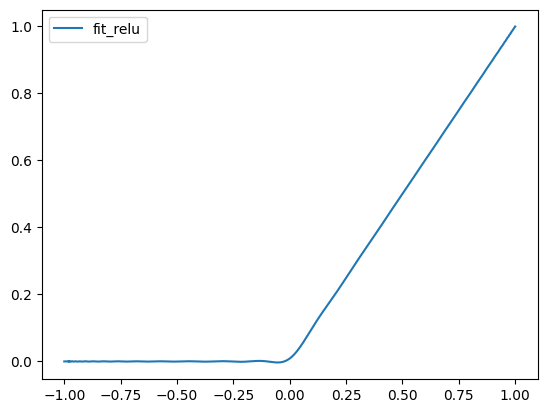

In [12]:
print("Numpy power series polynomial fit")
x = np.linspace(-1, 1, 1000)
fit_relu = P.fit(x, np.maximum(0, x), 3* 2**10, domain=[-1, 1])

print(f"fit_relu degree: {fit_relu.degree()}")
print(f"fit_relu depth: {ceil(log2(fit_relu.degree()))}")
v_relu = np.vectorize(fit_relu)
error = np.abs(v_relu(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.001).sum()
print(f"Percent of points within 0.001: {percent_passed/10.0}%")
percent_passed = (error < 0.01).sum()
print(f"Percent of points within 0.01: {percent_passed/10.0}%")

plt.plot(x, fit_relu(x), label="fit_relu")
plt.legend()
plt.show()

Numpy Chebyshev ReLU fit


/home/dangerginger/code/FHEnom/.venv/lib/python3.12/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


fit_relu degree: 4095
fit_relu depth: 12
Average error: 2.498128250484968e-15
Max error: 9.094947017729282e-13
Percent of points within 0.001: 100.0%
Percent of points outside 0.001: 0.0%
4096


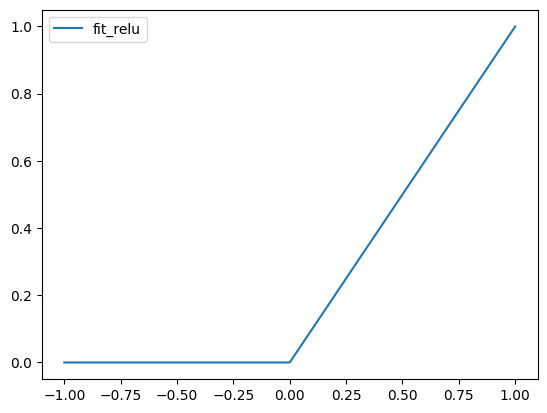

In [13]:
print("Numpy Chebyshev ReLU fit")
fit_relu = C.fit(x, np.maximum(0, x), 4095, domain=[-1, 1])

print(f"fit_relu degree: {fit_relu.degree()}")
print(f"fit_relu depth: {ceil(log2(fit_relu.degree()))}")
v_relu = np.vectorize(fit_relu)
error = np.abs(v_relu(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.001).sum()
print(f"Percent of points within 0.001: {percent_passed/10.0}%")
percent_failed = (error >= 0.001).sum()
print(f"Percent of points outside 0.001: {percent_failed/10.0}%")
cheb_coeffs = fit_relu.coef.tolist()
print(len(cheb_coeffs))
with (open("relu_cheb_coeffs.txt", "w")) as f:
    f.write(str(cheb_coeffs))

plt.plot(x, fit_relu(x), label="fit_relu")
plt.legend()
plt.show()

In [14]:
from mpmath import mp
import numpy



def bisection_search(f, low:float, high:float):
    """
    A root finding method that does not rely on derivatives

    :param f: a function f: X -> R
    :param low: the lower bracket
    :param high: the upper limit bracket
    :return: the location of the root, e.g. f(mid) ~ 0
    """
    # flip high and low if out of order
    if f(high) < f(low):
        low, high = high, low

    # find mid point
    mid = .5 * (low + high)

    while True:

        # bracket up
        if f(mid) < 0:
            low = mid
        # braket down
        else:
            high = mid

        # update mid point
        mid = .5 * (high + low)

        # break if condition met
        if abs(high - low) < 10 ** (-(mp.dps / 2)):
            break

    return mid


def concave_max(f, low:float, high:float):
    """
    Forms a lambda for the approximate derivative and finds the root

    :param f: a function f: X -> R
    :param low: the lower bracket
    :param high: the upper limit bracket
    :return: the location of the root f'(mid) ~ 0
    """
    # create an approximate derivative expression
    scale = high - low

    h = mp.mpf('0.' + ''.join(['0' for i in range(int(mp.dps / 1.5))]) + '1') * scale
    df = lambda x: (f(x + h) - f(x - h)) / (2.0 * h)

    return bisection_search(df, low, high)

def chev_points(n:int, lower:float = -1, upper:float = 1):
    """
    Generates a set of chebychev points spaced in the range [lower, upper]
    :param n: number of points
    :param lower: lower limit
    :param upper: upper limit
    :return: a list of multipressison chebychev points that are in the range [lower, upper]
    """
    #generate chebeshev points on a range [-1, 1]
    index = numpy.arange(1, n+1)
    range_ = abs(upper - lower)
    return [(.5*(mp.cos((2*i-1)/(2*n)*mp.pi)+1))*range_ + lower for i in index]


def remez(func, n_degree:int, lower:float=-1, upper:float=1, max_iter:int = 10):
    """
    :param func: a function (or lambda) f: X -> R
    :param n_degree: the degree of the polynomial to approximate the function f
    :param lower: lower range of the approximation
    :param upper: upper range of the approximation
    :return: the polynomial coefficients, and an approximate maximum error associated with this approximation
    """
    # initialize the node points

    x_points = chev_points(n_degree + 2, lower, upper)

    A = mp.matrix(n_degree + 2)
    coeffs = numpy.zeros(n_degree + 2)

    # place in the E column
    mean_error = float('inf')

    for i in range(n_degree + 2):
        A[i, n_degree + 1] = (-1) ** (i + 1)

    for i in range(max_iter):

        # build the system
        vander = numpy.polynomial.chebyshev.chebvander(x_points, n_degree)

        for i in range(n_degree + 2):
            for j in range(n_degree + 1):
                A[i, j] = vander[i, j]

        b = mp.matrix([func(x) for x in x_points])
        l = mp.lu_solve(A, b)

        coeffs = l[:-1]

        # build the residual expression
        r_i = lambda x: (func(x) - numpy.polynomial.chebyshev.chebval(x, coeffs))

        interval_list = list(zip(x_points, x_points[1:]))
        #         interval_list = [[x_points[i], x_points[i+1]] for i in range(len(x_points)-1)]

        intervals = [upper]
        intervals.extend([bisection_search(r_i, *i) for i in interval_list])
        intervals.append(lower)

        extermum_interval = [[intervals[i], intervals[i + 1]] for i in range(len(intervals) - 1)]

        extremums = [concave_max(r_i, *i) for i in extermum_interval]

        extremums[0] = mp.mpf(upper)
        extremums[-1] = mp.mpf(lower)

        errors = [abs(r_i(i)) for i in extremums]
        mean_error = numpy.mean(errors)

        if numpy.max([abs(error - mean_error) for error in errors]) < 0.000001 * mean_error:
            break

        x_points = extremums

    return [float(i) for i in numpy.polynomial.chebyshev.cheb2poly(coeffs)], float(mean_error)

def c_code_gen(data_type, name, poly_coeffs, comments = None):
    method_string = f'{data_type} {name} ({data_type} x)' + '{\n'
    
    if comments is not None:
        method_string += '\t// ' + str(comments) + ' \n\n'
    
    data_type_converter = '' if data_type == 'double' else 'f'
    
    method_string += '\n'.join([f'\tconst {data_type} a_{i} = {str(val) + data_type_converter};' for i, val in enumerate(poly_coeffs)])
    
    horner = 'return a_0+'
    for i in range(len(poly_coeffs)-2):
        horner += f'x*(a_{i+1} +' 
    horner += f'x*a_{len(poly_coeffs)-1}' + ')'*(len(poly_coeffs)-2) + ';\n}'
    
    return method_string + '\n \t' + horner

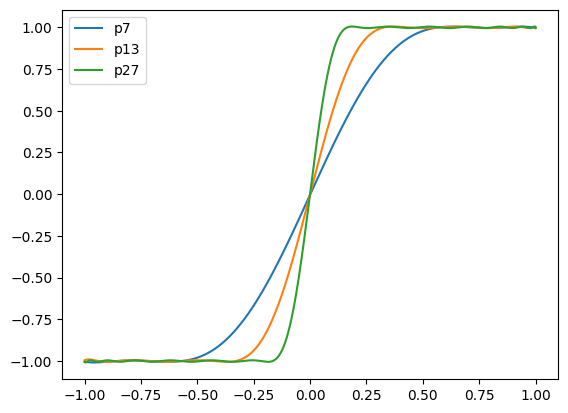

In [15]:
x = np.linspace(-1, 1, 16384)
relu = lambda x: max(0, x)
sn = lambda x: np.sign(x)
p3 = P(remez(sn, 3)[0])
p7 = P(remez(sn, 7)[0])
p9 = P(remez(sn, 9)[0])
p13 = P(remez(sn, 13)[0])
p15 = P(remez(sn, 15)[0])
p23 = P(remez(sn, 23)[0])
p27 = P(remez(sn, 27)[0])

# plt.plot(x, p3(x), label="p3")
plt.plot(x, p7(x), label="p7")
# plt.plot(x, p9(x), label="p9")
plt.plot(x, p13(x), label="p13")
# plt.plot(x, p15(x), label="p15")
plt.plot(x, p27(x), label="p27")
plt.legend()
plt.show()

[]

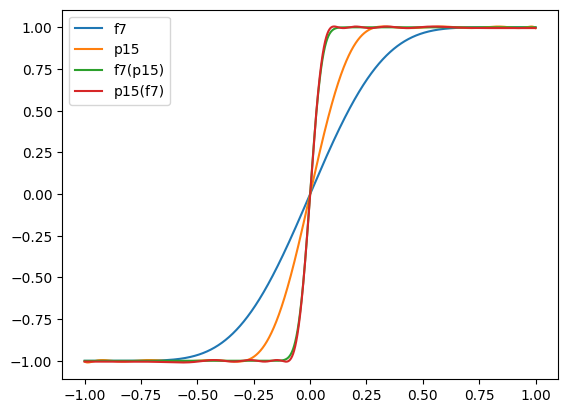

In [16]:

plt.plot(x, f7(x), label="f7")
plt.plot(x, p15(x), label="p15")
plt.plot(x, f7(p15(x)), label="f7(p15)")
plt.plot(x, p15(f7(x)), label="p15(f7)")
plt.legend()
plt.plot()

0.015211404409894907
0.0002698210339174979
Passed: 127615 (97.36%)

[0.00396727728244575, 10.652521084917275, -0.2922923840818222, -261.42588907712803, 8.395142684240188, 4501.131297799683, -126.94384493236345, -48559.07851566861, 1151.4062695691264, 342053.3996443146, -6741.318057472586, -1635509.8622923633, 26633.12416241995, 5455121.056282173, -72840.48489123819, -12896006.785314318, 139408.35642835972, 21710957.65540806, -186052.20423293096, -25834389.79263134, 169539.87218304444, 21215628.423835542, -100507.9403798162, -11433186.635497518, 34923.03715375683, 3637142.366575083, -5395.0161044159295, -517500.1054237726]


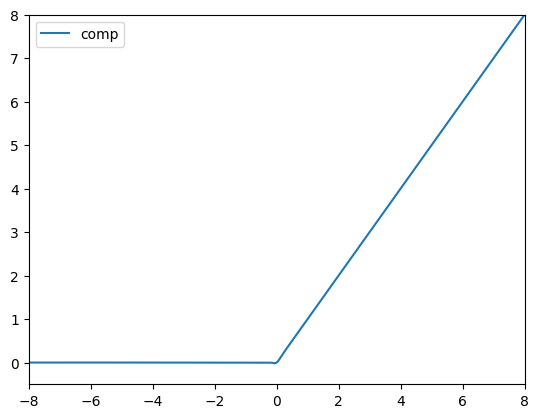

In [38]:

scale = 8
x = np.linspace(-scale, scale, scale*16384)

# comp = (x + x * f7(g3(g3(x))))/2 # 98.16%
comp = (x + x * f1(p27(g3(x/scale))))/2 # 98.55%
error = np.abs(comp - np.maximum(0, x))
print(np.max(error))
print(np.average(error))
passed = np.sum(error < 0.001)
print(f"Passed: {passed} ({passed/len(x)*100:.2f}%)\n")
print (p27.coef.tolist())

# test = (x + x * f3(p7(g4(x))))/2
# test_error = np.abs(test - np.maximum(0, x))
# print(np.max(test_error))
# print(np.average(test_error))
# passed = np.sum(test_error < 0.001)
# print(f"Passed: {passed} ({passed/16384*100:.2f}%)\n")

plt.plot(x, comp, label="comp")
# plt.plot(x, test_error, label="test_error")
plt.xlim(-8, 8)
plt.ylim(-0.5, 8)
plt.legend()
plt.show()

7.01622807088215
1.7600654027255516
Passed: 25858 (19.73%)

[0.00396727728244575, 10.652521084917275, -0.2922923840818222, -261.42588907712803, 8.395142684240188, 4501.131297799683, -126.94384493236345, -48559.07851566861, 1151.4062695691264, 342053.3996443146, -6741.318057472586, -1635509.8622923633, 26633.12416241995, 5455121.056282173, -72840.48489123819, -12896006.785314318, 139408.35642835972, 21710957.65540806, -186052.20423293096, -25834389.79263134, 169539.87218304444, 21215628.423835542, -100507.9403798162, -11433186.635497518, 34923.03715375683, 3637142.366575083, -5395.0161044159295, -517500.1054237726]


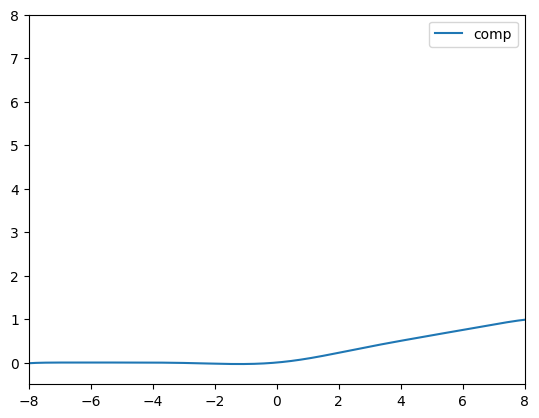

In [43]:
comp = P([
    0.0,
    0.5,
    1.9464111328125,
    0.0,
    -6.837525027804077,
    0.0,
    17.959225521757084,
    0.0,
    -29.974183606113115,
    0.0,
    31.015907511299496,
    0.0,
    -18.89236725740829,
    0.0,
    6.038270720324051,
    0.0,
    -0.771967065749801]
)

error = np.abs(comp(x/8) - np.maximum(0, x))
print(np.max(error))
print(np.average(error))
passed = np.sum(error < 0.001)
print(f"Passed: {passed} ({passed/len(x)*100:.2f}%)\n")
print (p27.coef.tolist())

# test = (x + x * f3(p7(g4(x))))/2
# test_error = np.abs(test - np.maximum(0, x))
# print(np.max(test_error))
# print(np.average(test_error))
# passed = np.sum(test_error < 0.001)
# print(f"Passed: {passed} ({passed/16384*100:.2f}%)\n")

plt.plot(x, comp(x/8), label="comp")
# plt.plot(x, test_error, label="test_error")
plt.xlim(-8, 8)
plt.ylim(-0.5, 8)
plt.legend()
plt.show()

/home/dangerginger/code/FHEnom/.venv/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:756: RuntimeWarning: overflow encountered in multiply
  c0 = c[-i] + c0*x
/tmp/ipykernel_64194/410383843.py:9: RuntimeWarning: overflow encountered in multiply
  y = (x + x * y) / 2


ValueError: x and y must have same first dimension, but have shapes (1000,) and (131072,)

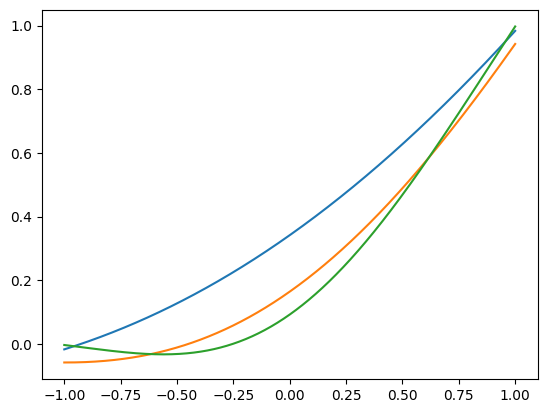

In [18]:
from numpy.polynomial import Chebyshev as C
cheb7 = C.fit(x, np.maximum(0, x), 7, domain=[-1, 1])
cheb15 = C.fit(x, np.maximum(0, x), 15, domain=[-1, 1])
cheb27 = C.fit(x, np.maximum(0, x), 27, domain=[-1, 1])

y = g3(x)
y = g3(y)
y = f7(y)
y = (x + x * y) / 2



x = np.linspace(-1, 1, 1000)
plt.plot(x, cheb7(x), label="cheb7")
plt.plot(x, cheb15(x), label="cheb15")
plt.plot(x, cheb27(x), label="cheb27")
plt.plot(x, y, label="composition")
plt.legend()
plt.show()


Average error: 0.00027156778301334796
Max error: 0.0013192671658482612
Percent of points within 0.001: 99.3%
Percent of points outside 0.001: 0.7000000000000001%

 expanded_relu
first_part degree: 15
first_part depth: 4
[0.5, 1.571044921875, 0.0, -3.665771484375, 0.0, 6.598388671875, 0.0, -7.855224609375, 0.0, 6.109619140625, 0.0, -2.999267578125, 0.0, 0.845947265625, 0.0, -0.104736328125]
0.5
second_part degree: 175
second_part depth: 8
[0.0, 47.50610001757741, 0.0, -20293.753623746183, 0.0, 4589096.335039401, 0.0, -584564066.2735186, 0.0, 48024481626.22483, 0.0, -2798003486895.762, 0.0, 123399413929634.22, 0.0, -4313227335962613.0, 0.0, 1.2353440250892805e+17, 0.0, -2.972158132307247e+18, 0.0, 6.122408705489683e+19, 0.0, -1.095992672209007e+21, 0.0, 1.725386071867204e+22, 0.0, -2.4118028861495996e+23, 0.0, 3.017303067568464e+24, 0.0, -3.4008971577508526e+25, 0.0, 3.472942147310471e+26, 0.0, -3.2285911076177603e+27, 0.0, 2.7437412224243894e+28, 0.0, -2.139277117723485e+29, 0.0, 1.5352

/Users/dangerginger/code/tenseal_env/lib/python3.9/site-packages/numpy/polynomial/polynomial.py:756: RuntimeWarning: invalid value encountered in scalar multiply
  c0 = c[-i] + c0*x


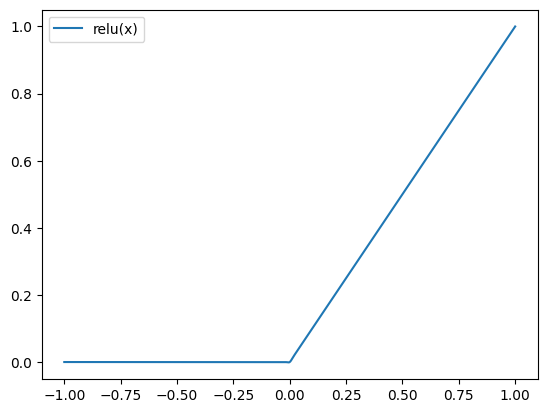

In [ ]:
x = np.linspace(-1, 1, 10000)

def sign(x):
    x = g3(x)
    x = g3(x)
    x = f5(x)
    return x

def relu(x: float)  -> float:
    return (x + x * f7(g4(g4(x))))/2.
    # y = g2(x)
    # y = g2(y)
    # y = g3(y)
    # return comp_fn(y)
    # y = f7(y)
    # return (x + x * y) /2.

v_relu = np.vectorize(relu)
error = np.abs(v_relu(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.001).sum()
print(f"Percent of points within 0.001: {percent_passed/len(x)*100}%")
percent_failed = (error >= 0.001).sum()
print(f"Percent of points outside 0.001: {percent_failed/len(x)*100}%")

print("\n expanded_relu")
first_part = f7/2. + 1/2.
print(f"first_part degree: {first_part.degree()}")
print(f"first_part depth: {ceil(log2(first_part.degree()))}")
print(first_part.coef.tolist())
print(first_part(0.))

second_part = g3(g2(g2))
print(f"second_part degree: {second_part.degree()}")
print(f"second_part depth: {ceil(log2(second_part.degree()))}")
print(second_part.coef.tolist())
print(second_part(0.))

composed = P([0, 1]) * first_part(second_part)
print(f"composed degree: {composed.degree()}")
print(f"composed depth: {ceil(log2(composed.degree()))}")
print(composed.coef.tolist())
print(composed(0.))

plt.plot(x, relu(x), label="relu(x)")
# plt.plot(x, f15(x), label="f15")
# plt.plot(x, f31(x), label="f31")
# plt.plot(x, f15(g4(x)), label="f15 ∘ g4")
# plt.plot(x, f63(x), label="f63")
plt.legend()
plt.show()

In [ ]:
print("Baseline")
baseline = P([0])
v_baseline = np.vectorize(baseline)
error = np.abs(v_baseline(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.04).sum()
print(f"Percent of points within 0.04: {percent_passed/10.0}%")
percent_failed = (error >= 0.04).sum()
print(f"Percent of points outside 0.04: {percent_failed/10.0}%")

print("\nSmall relu\n")
small_relu = P([0, 1./2.]) + P([0, 1./2.]) * f2(g1)
# print(small_relu)
print("Small relu degree: ", small_relu.degree())
# print(small_relu.coef.tolist())

v_small_relu = np.vectorize(small_relu)
error = np.abs(v_small_relu(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.04).sum()
print(f"Percent of points within 0.04: {percent_passed/10.0}%")
percent_failed = (error >= 0.04).sum()
print(f"Percent of points outside 0.04: {percent_failed/10.0}%")

print("\nSmall relu(small_relu)\n")
small_relu_2 = small_relu(small_relu)
# print(small_relu_2)
print("Small relu degree: ", small_relu_2.degree())
# print(small_relu_2.coef.tolist())

v_small_relu_2 = np.vectorize(small_relu_2)
error = np.abs(v_small_relu_2(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.04).sum()
print(f"Percent of points within 0.04: {percent_passed/10.0}%")
percent_failed = (error >= 0.04).sum()
print(f"Percent of points outside 0.04: {percent_failed/10.0}%")

just_f = ([0, 1.] + [0, 1.] * f7)/2.0
just_f
print("\nJust f7 degree: ", just_f.degree())
cxx_coefficients = np.flip(just_f.coef)
print(cxx_coefficients.tolist())
v_just_f = np.vectorize(P(just_f.coef))
f_error = np.abs(v_just_f(x) - np.maximum(0, x))
print(f"Average error: {np.sum(f_error)/1000}")
print(f"Max error: {f_error.max()}")

percent_passed = (f_error < 0.04).sum()
print(f"Percent of points within 0.04: {percent_passed/10.0}%")
percent_failed = (f_error >= 0.04).sum()
print(f"Percent of points outside 0.04: {percent_failed/10.0}%")

print("\n Fit relu test")
error = np.abs(v_fit_relu(x) - np.maximum(0, x))
print(f"Average error: {np.sum(error)/1000}")
print(f"Max error: {error.max()}")

percent_passed = (error < 0.04).sum()
print(f"Percent of points within 0.04: {percent_passed/10.0}%")
percent_failed = (error >= 0.04).sum()
print(f"Percent of points outside 0.04: {percent_failed/10.0}%")

plt.plot(x, small_relu(x), label="small_relu(x)")
plt.plot(x, just_f(x), label="just_f(x)")
plt.plot(x, fit_relu(x), label="fit_relu(x)")
plt.legend()
plt.show()

Baseline
Average error: 2.5002500250025004
Max error: 1.0
Percent of points within 0.04: 520.0%
Percent of points outside 0.04: 480.0%

Small relu

Small relu degree:  16
Average error: 0.10052623693345045
Max error: 0.03447025986527348
Percent of points within 0.04: 1000.0%
Percent of points outside 0.04: 0.0%

Small relu(small_relu)

Small relu degree:  256
Average error: 1030341615129651.5
Max error: 2.4128391703827932e+16
Percent of points within 0.04: 608.7%
Percent of points outside 0.04: 391.3%

Just f7 degree:  16
[-0.104736328125, 0.0, 0.845947265625, 0.0, -2.999267578125, 0.0, 6.109619140625, 0.0, -7.855224609375, 0.0, 6.598388671875, 0.0, -3.665771484375, 0.0, 1.571044921875, 0.5, 0.0]
Average error: 0.14704412598122563
Max error: 0.0427740406821998
Percent of points within 0.04: 888.8%
Percent of points outside 0.04: 111.2%

 Fit relu test


NameError: name 'v_fit_relu' is not defined